<a href="https://colab.research.google.com/github/meherunnisa01/AirbnbListing/blob/main/AirbnbListing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/listings.csv')

# Show the first few rows
df.head()

id                                               name  \
0  621960198566758900   The Historic Jesse Buel Farmhouse w/ Heated Pool   
1  932642358896439621                    Stylish top floor apt w/parking   
2            53567589  Private Garden Apt in Downtown Albany|Pets All...   
3            20671966                                   The Metropolitan   
4            24606880                                  The Western Suite   

     host_id host_name  neighbourhood_group    neighbourhood  latitude  \
0  382970529    Thomas                  NaN  FOURTEENTH WARD  42.66762   
1  232967878     Diana                  NaN  THIRTEENTH WARD  42.67224   
2  433096110     Brian                  NaN       SIXTH WARD  42.65204   
3   98744672      Bela                  NaN       NINTH WARD  42.65532   
4   98744672      Bela                  NaN       NINTH WARD  42.65431   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0  -73.79919  Entire home/apt  882.0               1                 15   
1  -73.79301  Entire home/apt  106.0               1                 37   
2  -73.76655  Entire home/apt   99.0               1                251   
3  -73.78244  Entire home/apt   58.0               2                 46   
4  -73.78178     Private room   50.0               2                 48   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2025-02-06               0.47                              12   
1  2025-02-15               1.88                              23   
2  2025-02-23               6.40                               4   
3  2025-01-19               0.51                               8   
4  2025-02-27               0.62                               8   

   availability_365  number_of_reviews_ltm  license  
0               330                      8      NaN  
1                86                     26      NaN  
2               341                     73      NaN  
3               248                      7      NaN  
4               340                      9      NaN

In [ ]:
df.head()

id                                               name  \
0  621960198566758900   The Historic Jesse Buel Farmhouse w/ Heated Pool   
1  932642358896439621                    Stylish top floor apt w/parking   
2            53567589  Private Garden Apt in Downtown Albany|Pets All...   
3            20671966                                   The Metropolitan   
4            24606880                                  The Western Suite   

     host_id host_name  neighbourhood_group    neighbourhood  latitude  \
0  382970529    Thomas                  NaN  FOURTEENTH WARD  42.66762   
1  232967878     Diana                  NaN  THIRTEENTH WARD  42.67224   
2  433096110     Brian                  NaN       SIXTH WARD  42.65204   
3   98744672      Bela                  NaN       NINTH WARD  42.65532   
4   98744672      Bela                  NaN       NINTH WARD  42.65431   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0  -73.79919  Entire home/apt  882.0               1                 15   
1  -73.79301  Entire home/apt  106.0               1                 37   
2  -73.76655  Entire home/apt   99.0               1                251   
3  -73.78244  Entire home/apt   58.0               2                 46   
4  -73.78178     Private room   50.0               2                 48   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2025-02-06               0.47                              12   
1  2025-02-15               1.88                              23   
2  2025-02-23               6.40                               4   
3  2025-01-19               0.51                               8   
4  2025-02-27               0.62                               8   

   availability_365  number_of_reviews_ltm  license  
0               330                      8      NaN  
1                86                     26      NaN  
2               341                     73      NaN  
3               248                      7      NaN  
4               340                      9      NaN

In [ ]:
# Fill numeric NaNs with mean
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)

# Fill object (text) NaNs with mode
df.fillna(df.select_dtypes(include=['object']).mode().iloc[0], inplace=True)

# Check info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              424 non-null    int64  
 1   name                            424 non-null    object 
 2   host_id                         424 non-null    int64  
 3   host_name                       424 non-null    object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   424 non-null    object 
 6   latitude                        424 non-null    float64
 7   longitude                       424 non-null    float64
 8   room_type                       424 non-null    object 
 9   price                           424 non-null    float64
 10  minimum_nights                  424 non-null    int64  
 11  number_of_reviews               424 non-null    int64  
 12  last_review                     424 

In [ ]:
# Compute an "overall" score by averaging 'number_of_reviews' and 'reviews_per_month'
df['overall'] = (df['number_of_reviews'] + df['reviews_per_month']) / 2

# Display the relevant columns
print(df[['number_of_reviews', 'reviews_per_month', 'overall']].head())


   number_of_reviews  reviews_per_month  overall
0                 15               0.47    7.735
1                 37               1.88   19.440
2                251               6.40  128.700
3                 46               0.51   23.255
4                 48               0.62   24.310


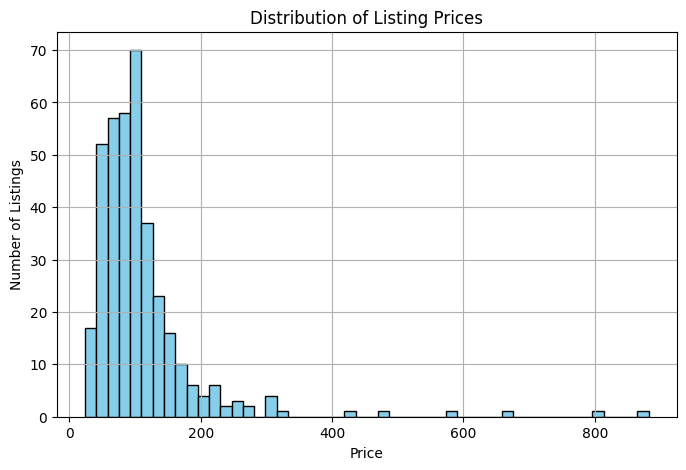

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/listings.csv')

# Clean and convert price column
df['price_clean'] = df['price'].astype(str).replace('[\$,]', '', regex=True).astype(float)

# Plot histogram
plt.figure(figsize=(8,5))
df['price_clean'].dropna().plot.hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Listing Prices')
plt.xlabel('Price')
plt.ylabel('Number of Listings')
plt.grid(True)
plt.show()

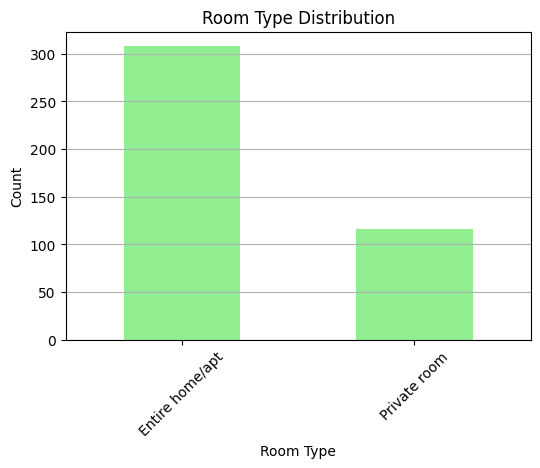

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/listings.csv')

# Plot bar chart
plt.figure(figsize=(6,4))
df['room_type'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

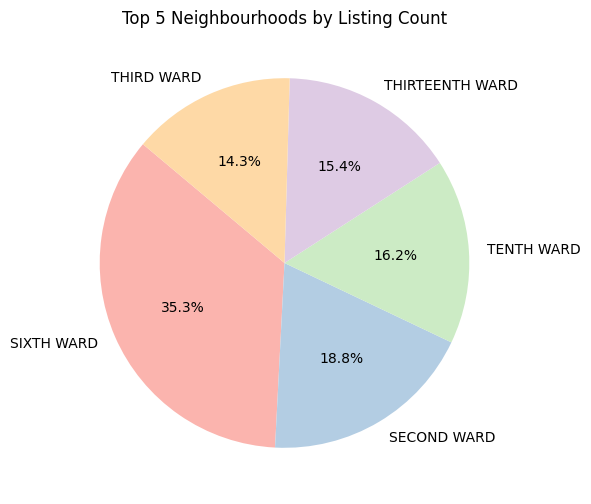

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/listings.csv')

# Get top 5 neighbourhoods
top_neighbourhoods = df['neighbourhood'].value_counts().nlargest(5)

# Plot pie chart
plt.figure(figsize=(6,6))
top_neighbourhoods.plot.pie(autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Top 5 Neighbourhoods by Listing Count')
plt.ylabel('')
plt.show()

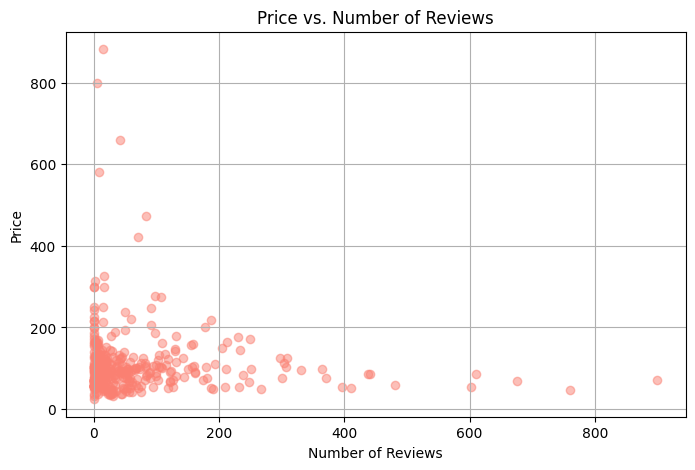

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/listings.csv')

# Clean and convert price column
df['price_clean'] = df['price'].astype(str).replace('[\$,]', '', regex=True).astype(float)

# Plot scatter
plt.figure(figsize=(8,5))
plt.scatter(df['number_of_reviews'], df['price_clean'], alpha=0.5, color='salmon')
plt.title('Price vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.grid(True)
plt.show()

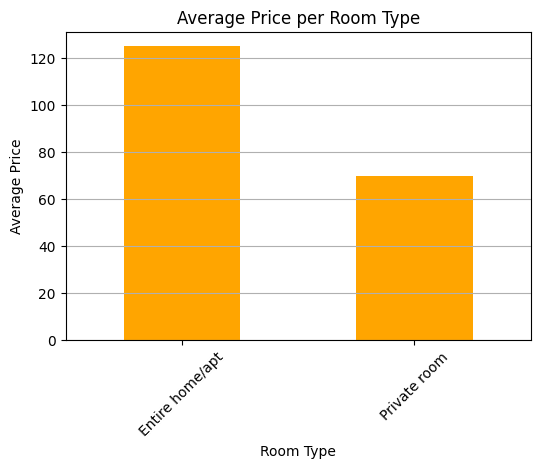

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/listings.csv')
df['price_clean'] = df['price'].astype(str).replace('[\$,]', '', regex=True).astype(float)

# Group by room type
avg_price = df.groupby('room_type')['price_clean'].mean()

# Plot
plt.figure(figsize=(6,4))
avg_price.plot(kind='bar', color='orange')
plt.title('Average Price per Room Type')
plt.ylabel('Average Price')
plt.xlabel('Room Type')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

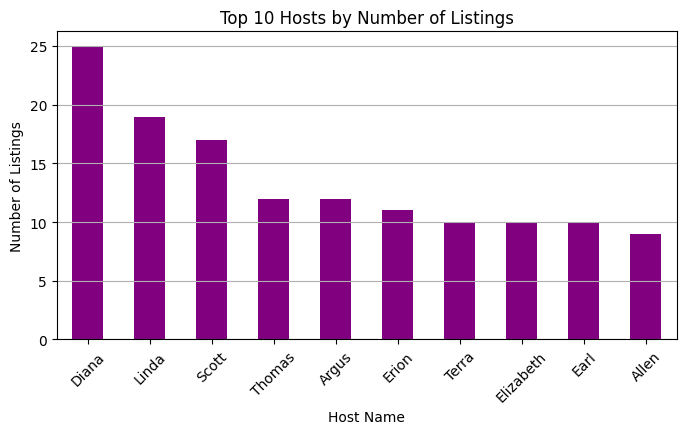

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/listings.csv')

# Top 10 hosts by number of listings
top_hosts = df['host_name'].value_counts().head(10)

# Plot
plt.figure(figsize=(8,4))
top_hosts.plot(kind='bar', color='purple')
plt.title('Top 10 Hosts by Number of Listings')
plt.ylabel('Number of Listings')
plt.xlabel('Host Name')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

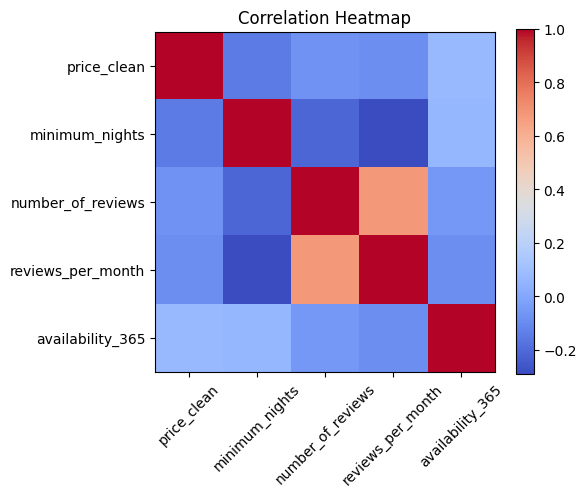

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/listings.csv')
df['price_clean'] = df['price'].astype(str).replace('[\$,]', '', regex=True).astype(float)

# Selecting numeric columns
num_df = df[['price_clean', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']]

# Correlation matrix
corr = num_df.corr()

# Plot heatmap manually
plt.figure(figsize=(6,5))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

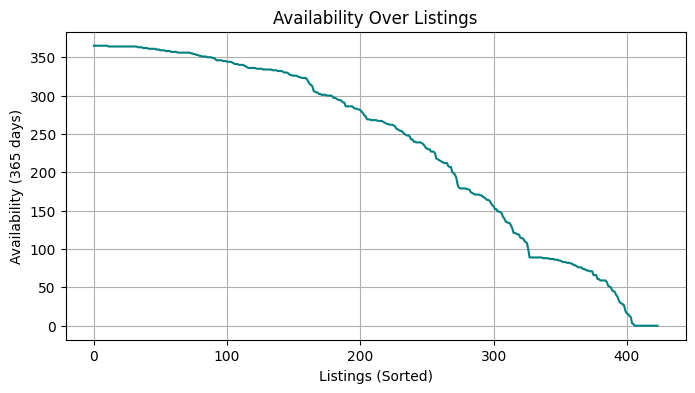

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/listings.csv')

# Sort by availability
sorted_df = df.sort_values(by='availability_365', ascending=False)

# Plot
plt.figure(figsize=(8,4))
plt.plot(sorted_df['availability_365'].reset_index(drop=True), color='teal')
plt.title('Availability Over Listings')
plt.xlabel('Listings (Sorted)')
plt.ylabel('Availability (365 days)')
plt.grid(True)
plt.show()

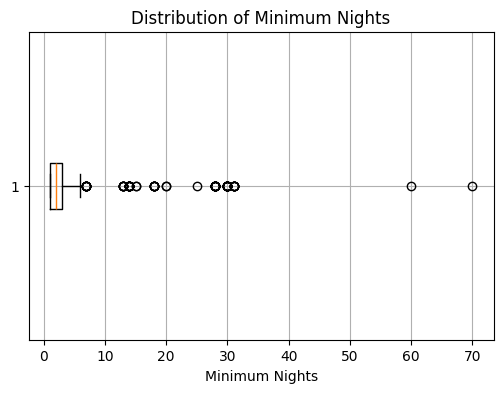

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/listings.csv')

# Boxplot to see distribution and outliers
plt.figure(figsize=(6,4))
plt.boxplot(df['minimum_nights'].dropna(), vert=False)
plt.title('Distribution of Minimum Nights')
plt.xlabel('Minimum Nights')
plt.grid(True)
plt.show()

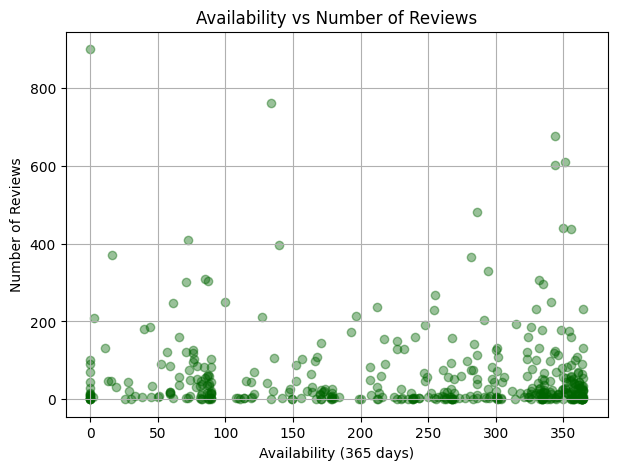

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/listings.csv')

plt.figure(figsize=(7,5))
plt.scatter(df['availability_365'], df['number_of_reviews'], alpha=0.4, color='darkgreen')
plt.title('Availability vs Number of Reviews')
plt.xlabel('Availability (365 days)')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

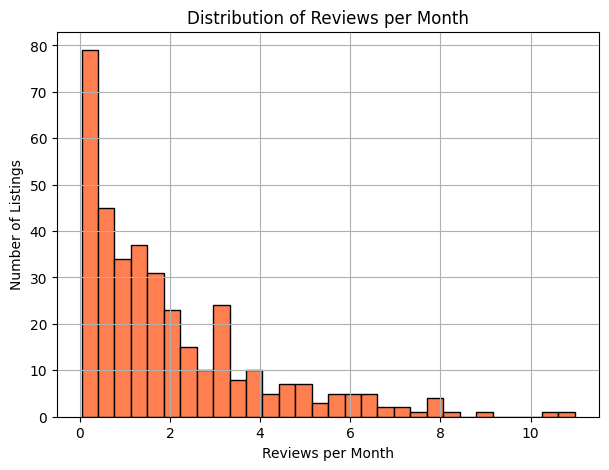

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/listings.csv')

plt.figure(figsize=(7,5))
df['reviews_per_month'].dropna().plot.hist(bins=30, color='coral', edgecolor='black')
plt.title('Distribution of Reviews per Month')
plt.xlabel('Reviews per Month')
plt.ylabel('Number of Listings')
plt.grid(True)
plt.show()

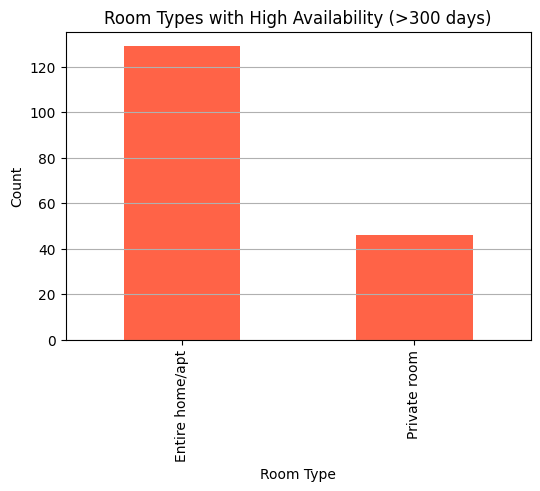

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/listings.csv')

# Filter listings with availability > 300
high_avail = df[df['availability_365'] > 300]
top_high_avail = high_avail['room_type'].value_counts()

plt.figure(figsize=(6,4))
top_high_avail.plot(kind='bar', color='tomato')
plt.title('Room Types with High Availability (>300 days)')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

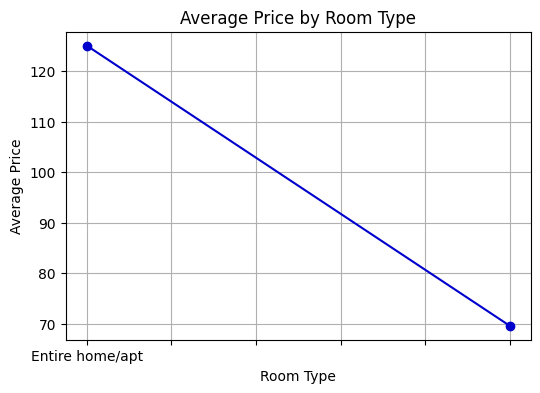

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/listings.csv')
df['price_clean'] = df['price'].astype(str).replace('[\$,]', '', regex=True).astype(float)

# Group by room type and calculate mean price
avg_price_by_room = df.groupby('room_type')['price_clean'].mean()

# Line plot
plt.figure(figsize=(6,4))
avg_price_by_room.plot(marker='o', linestyle='-', color='mediumblue')
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

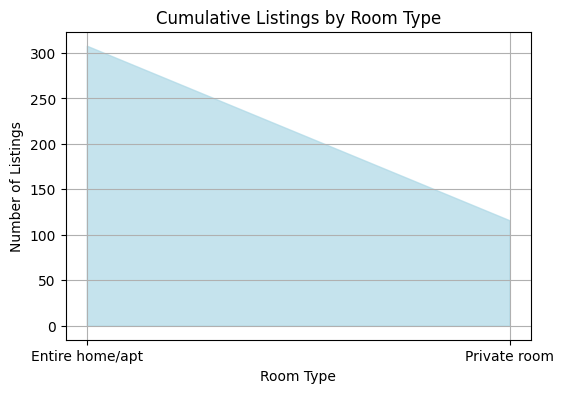

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/listings.csv')

# Count listings per room type
room_type_counts = df['room_type'].value_counts().sort_index()

# Area chart
plt.figure(figsize=(6,4))
plt.fill_between(room_type_counts.index, room_type_counts.values, color='lightblue', alpha=0.7)
plt.title('Cumulative Listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.grid(True)
plt.show()

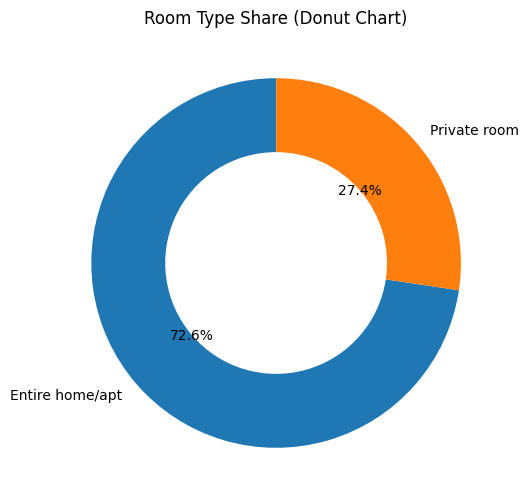

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/listings.csv')
room_counts = df['room_type'].value_counts()

# Donut chart
plt.figure(figsize=(6,6))
plt.pie(room_counts, labels=room_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width':0.4})
plt.title('Room Type Share (Donut Chart)')
plt.show()

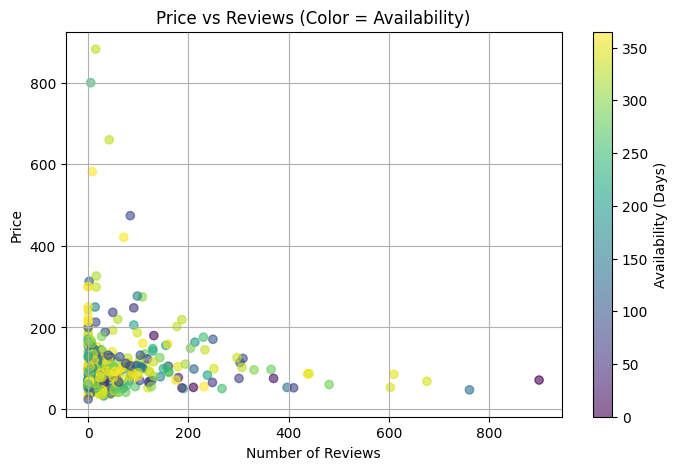

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/listings.csv')
df['price_clean'] = df['price'].astype(str).replace('[\$,]', '', regex=True).astype(float)

plt.figure(figsize=(8,5))
scatter = plt.scatter(df['number_of_reviews'], df['price_clean'], c=df['availability_365'], cmap='viridis', alpha=0.6)
plt.title('Price vs Reviews (Color = Availability)')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.colorbar(scatter, label='Availability (Days)')
plt.grid(True)
plt.show()

In [30]:

import seaborn as sns
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/listings.csv.gz')

# Create a pairplot
sns.pairplot(df)




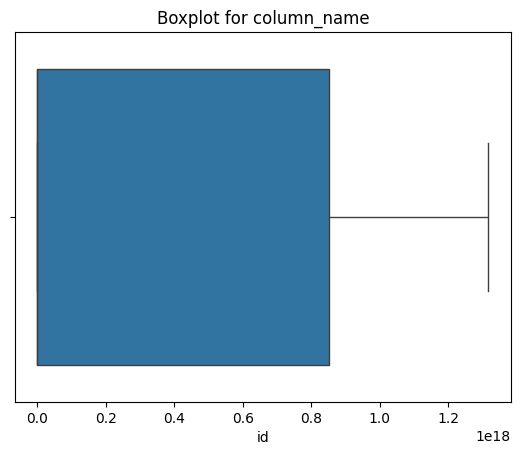

In [14]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/listings.csv.gz')

# Create a boxplot to visualize the distribution of a numerical column
sns.boxplot(x='id', data=df)
plt.title('Boxplot for column_name')
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128420 (\N{BLACK HEART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


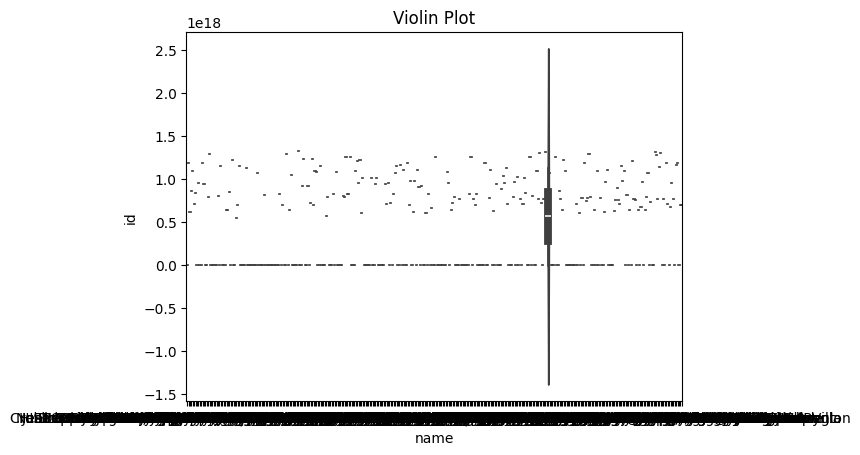

In [23]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/listings.csv.gz')

# Create a violin plot
sns.violinplot(x='name', y='id', data=df)
plt.title('Violin Plot')
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128420 (\N{BLACK HEART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


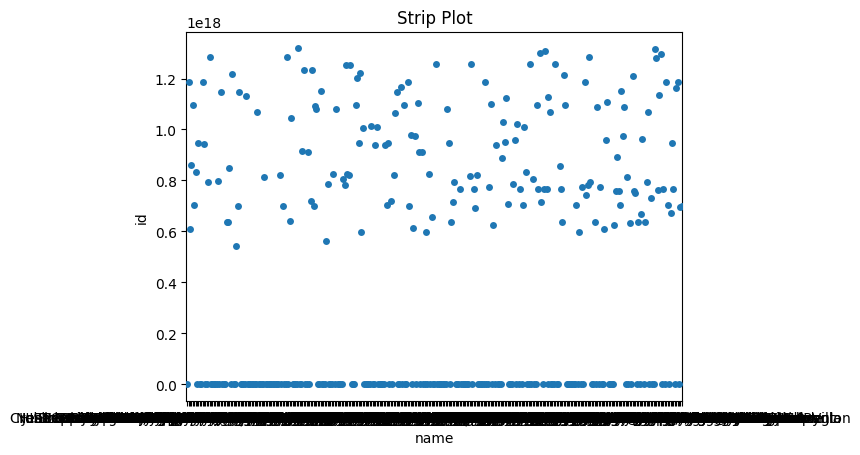

In [25]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/listings.csv.gz')

# Create a stripplot
sns.stripplot(x='name', y='id', data=df, jitter=True)
plt.title('Strip Plot')
plt.show()


In [16]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/listings.csv.gz')

# Filter rows where the numerical column value is greater than 100
filtered_df = df[df['id'] > 100]
print(filtered_df.head())


                    id                                       listing_url  \
0             47117855             https://www.airbnb.com/rooms/47117855   
1  1185895451922999542  https://www.airbnb.com/rooms/1185895451922999542   
2   611369443768980724   https://www.airbnb.com/rooms/611369443768980724   
3   861068035850251868   https://www.airbnb.com/rooms/861068035850251868   
4  1095252810134424371  https://www.airbnb.com/rooms/1095252810134424371   

        scrape_id last_scraped           source  \
0  20241227033100   2024-12-27      city scrape   
1  20241227033100   2024-12-27      city scrape   
2  20241227033100   2024-12-27  previous scrape   
3  20241227033100   2024-12-27      city scrape   
4  20241227033100   2024-12-27      city scrape   

                                              name  \
0        Peaceful 2br cottage in the 🖤 of Angaston   
1                   Jacobs Creek Retreat - Orchard   
2  Neat & Tidy Home with Outdoor Entertaining Area   
3                   

In [17]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/listings.csv.gz')

# Group by a categorical column and calculate the mean of numerical columns
grouped_df = df.groupby('name')['id'].mean()
print(grouped_df)


name
"LiebenGott" - Luxury 4 bedroom, central location     1.786255e+07
"Lochnagar Barossa"  - Central Barossa Location -     5.185104e+07
"The Shed"                                            5.426792e+06
"Topp House" Retreat Barossa                          5.324547e+07
'In The Vines' Guest Cottage, Barossa Valley SA       3.466159e+07
                                                          ...     
Wings Barossa Bird & Bush Retreat - Barossa Region    3.278938e+07
Woodland Cottage                                      2.706520e+07
Yaldara House - House next to a Chateau               6.683970e+17
Your complete Barossa experience for up to 16         2.017551e+07
barossa studio 57 accommodation                       3.136486e+07
Name: id, Length: 353, dtype: float64


In [18]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/listings.csv.gz')

# Sort the data based on the 'numerical_column' in descending order
sorted_df = df.sort_values(by='id', ascending=False)
print(sorted_df.head())


                      id                                       listing_url  \
79   1318012957546152021  https://www.airbnb.com/rooms/1318012957546152021   
334  1315618870381803395  https://www.airbnb.com/rooms/1315618870381803395   
255  1309277377941739200  https://www.airbnb.com/rooms/1309277377941739200   
251  1301247673858732294  https://www.airbnb.com/rooms/1301247673858732294   
338  1296150230438530336  https://www.airbnb.com/rooms/1296150230438530336   

          scrape_id last_scraped       source  \
79   20241227033100   2024-12-27  city scrape   
334  20241227033100   2024-12-27  city scrape   
255  20241227033100   2024-12-27  city scrape   
251  20241227033100   2024-12-27  city scrape   
338  20241227033100   2024-12-27  city scrape   

                                name  \
79          Charming Barossa Retreat   
334  Norm's Vineyard Barossa Retreat   
255                     The Gum Leaf   
251                    Six on Sibley   
338     Gorgeous, large Barossa home

In [19]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/listings.csv.gz')

# Fill missing values in a specific column with the mean value of that column
df['id'].fillna(df['id'].mean(), inplace=True)

# Alternatively, drop rows with missing values
df.dropna(subset=['id'], inplace=True)

print(df.head())


                    id                                       listing_url  \
0             47117855             https://www.airbnb.com/rooms/47117855   
1  1185895451922999542  https://www.airbnb.com/rooms/1185895451922999542   
2   611369443768980724   https://www.airbnb.com/rooms/611369443768980724   
3   861068035850251868   https://www.airbnb.com/rooms/861068035850251868   
4  1095252810134424371  https://www.airbnb.com/rooms/1095252810134424371   

        scrape_id last_scraped           source  \
0  20241227033100   2024-12-27      city scrape   
1  20241227033100   2024-12-27      city scrape   
2  20241227033100   2024-12-27  previous scrape   
3  20241227033100   2024-12-27      city scrape   
4  20241227033100   2024-12-27      city scrape   

                                              name  \
0        Peaceful 2br cottage in the 🖤 of Angaston   
1                   Jacobs Creek Retreat - Orchard   
2  Neat & Tidy Home with Outdoor Entertaining Area   
3                   

<ipython-input-19-47e27f42f424>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['id'].fillna(df['id'].mean(), inplace=True)


In [20]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/listings.csv.gz')

# Create a new column based on a condition (e.g., categorizing 'numerical_column')
df['name'] = df['id'].apply(lambda x: 'High' if x > 50 else 'Low')

print(df.head())


                    id                                       listing_url  \
0             47117855             https://www.airbnb.com/rooms/47117855   
1  1185895451922999542  https://www.airbnb.com/rooms/1185895451922999542   
2   611369443768980724   https://www.airbnb.com/rooms/611369443768980724   
3   861068035850251868   https://www.airbnb.com/rooms/861068035850251868   
4  1095252810134424371  https://www.airbnb.com/rooms/1095252810134424371   

        scrape_id last_scraped           source  name  \
0  20241227033100   2024-12-27      city scrape  High   
1  20241227033100   2024-12-27      city scrape  High   
2  20241227033100   2024-12-27  previous scrape  High   
3  20241227033100   2024-12-27      city scrape  High   
4  20241227033100   2024-12-27      city scrape  High   

                                         description  \
0  Plum Cottage is a renovated 1940’s miner’s cot...   
1  Our "Honeymoon Suite"; this beautifully restor...   
2  51 Gramp Ave overlooks the wo

In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/listings.csv.gz')

# Check the data types of each column
print(df.dtypes)


id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object


In [28]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/listings.csv.gz')

# Convert a column to a specific data type
df['id'] = pd.to_numeric(df['id'], errors='coerce')

# Convert a column to a categorical data type
df['name'] = df['name'].astype('category')

# Check the updated data types
print(df.dtypes)


id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object
